# Predicting Diabetes Using Machine Learning

## Introduction
This notebook explores various Python-based machine learning libraries to build a predictive model capable of determining whether an individual has diabetes based on their medical attributes.

## Problem Definition
The goal of this predictive model is to classify medical test results into **diabetic** or **non-diabetic**.

## Required Libraries
We will utilize the following tools and libraries:
- Classification algorithms
- `pandas` for data manipulation
- `LogisticRegression` from `sklearn`
- `Seaborn` and `Matplotlib` for data visualization

## Approach
We will follow this structured workflow:
1. **Problem Definition**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Data Visualization**
5. **Evaluation**
6. **Feature Selection**
7. **Modeling**
8. **Experimentation**

## Dataset
The dataset can be found on Kaggle: [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset).

### Features Description
The dataset includes the following features:

| Feature                      | Description                                      |
|------------------------------|--------------------------------------------------|
| `Pregnancies`                | Number of pregnancies                           |
| `Glucose`                    | Glucose level in blood                         |
| `BloodPressure`              | Blood pressure measurement                     |
| `SkinThickness`              | Thickness of the skin                          |
| `Insulin`                    | Insulin level in blood                         |
| `BMI`                        | Body Mass Index (BMI)                          |
| `DiabetesPedigreeFunction`   | Diabetes percentage                            |
| `Age`                        | Age of the individual                          |
| `Outcome`                    | Diabetes diagnosis (`1` = Yes, `0` = No)       |

## Next Steps
In the upcoming sections, we will perform:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training & Evaluation


## **Exploratory Data Analysis**

In [117]:
# Import the tools

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)  # Displaying metric results


import warnings 
warnings.filterwarnings('ignore', category=UserWarning) 

In [3]:

diabetes_df = pd.read_csv("KNN_Dataset.csv")

diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
duplicates = diabetes_df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

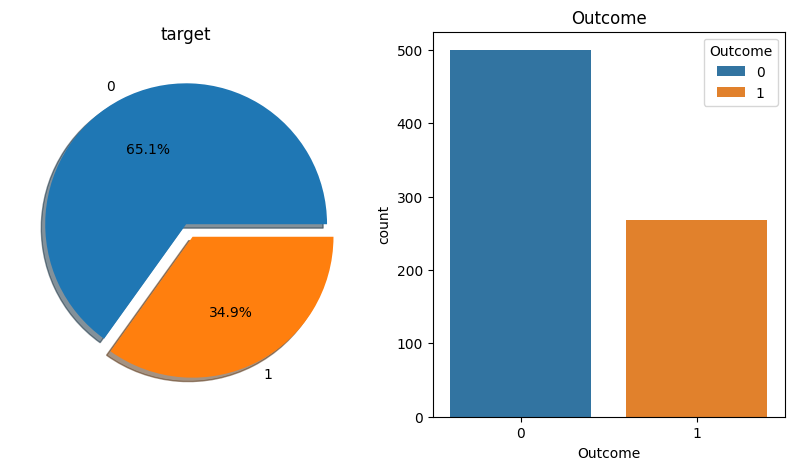

In [9]:
# Distribution of features
import matplotlib.pyplot as plt
import seaborn as sns
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(10,5))
diabetes_df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=diabetes_df, x='Outcome',hue='Outcome',ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

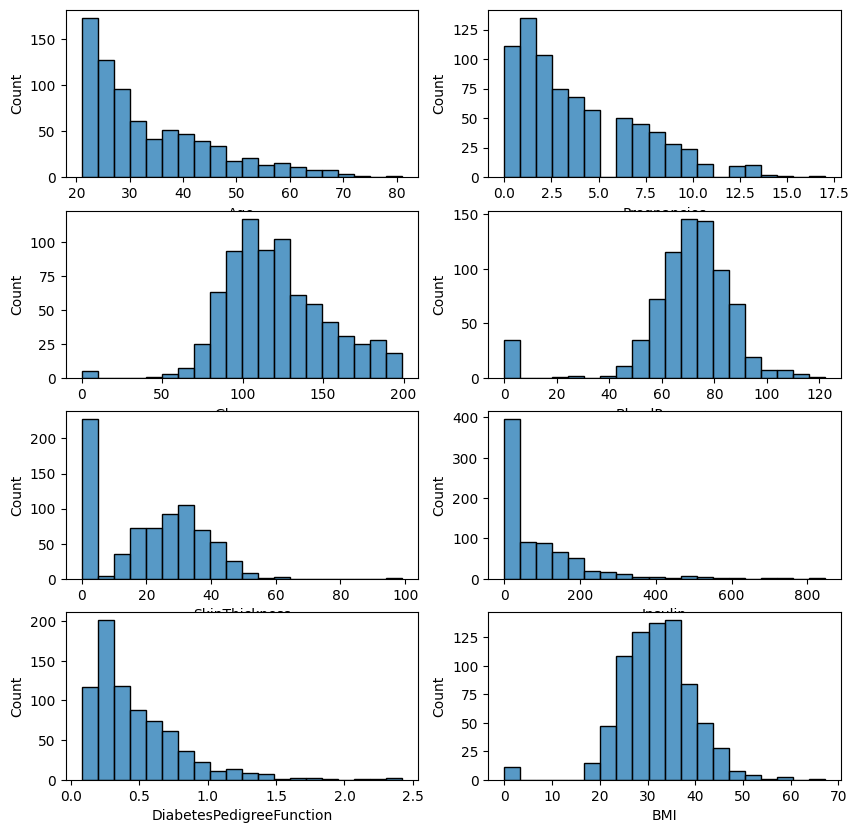

In [10]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.histplot(diabetes_df.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(diabetes_df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(diabetes_df.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(diabetes_df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.histplot(diabetes_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(diabetes_df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(diabetes_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(diabetes_df.BMI, bins = 20, ax=ax[3,1]);

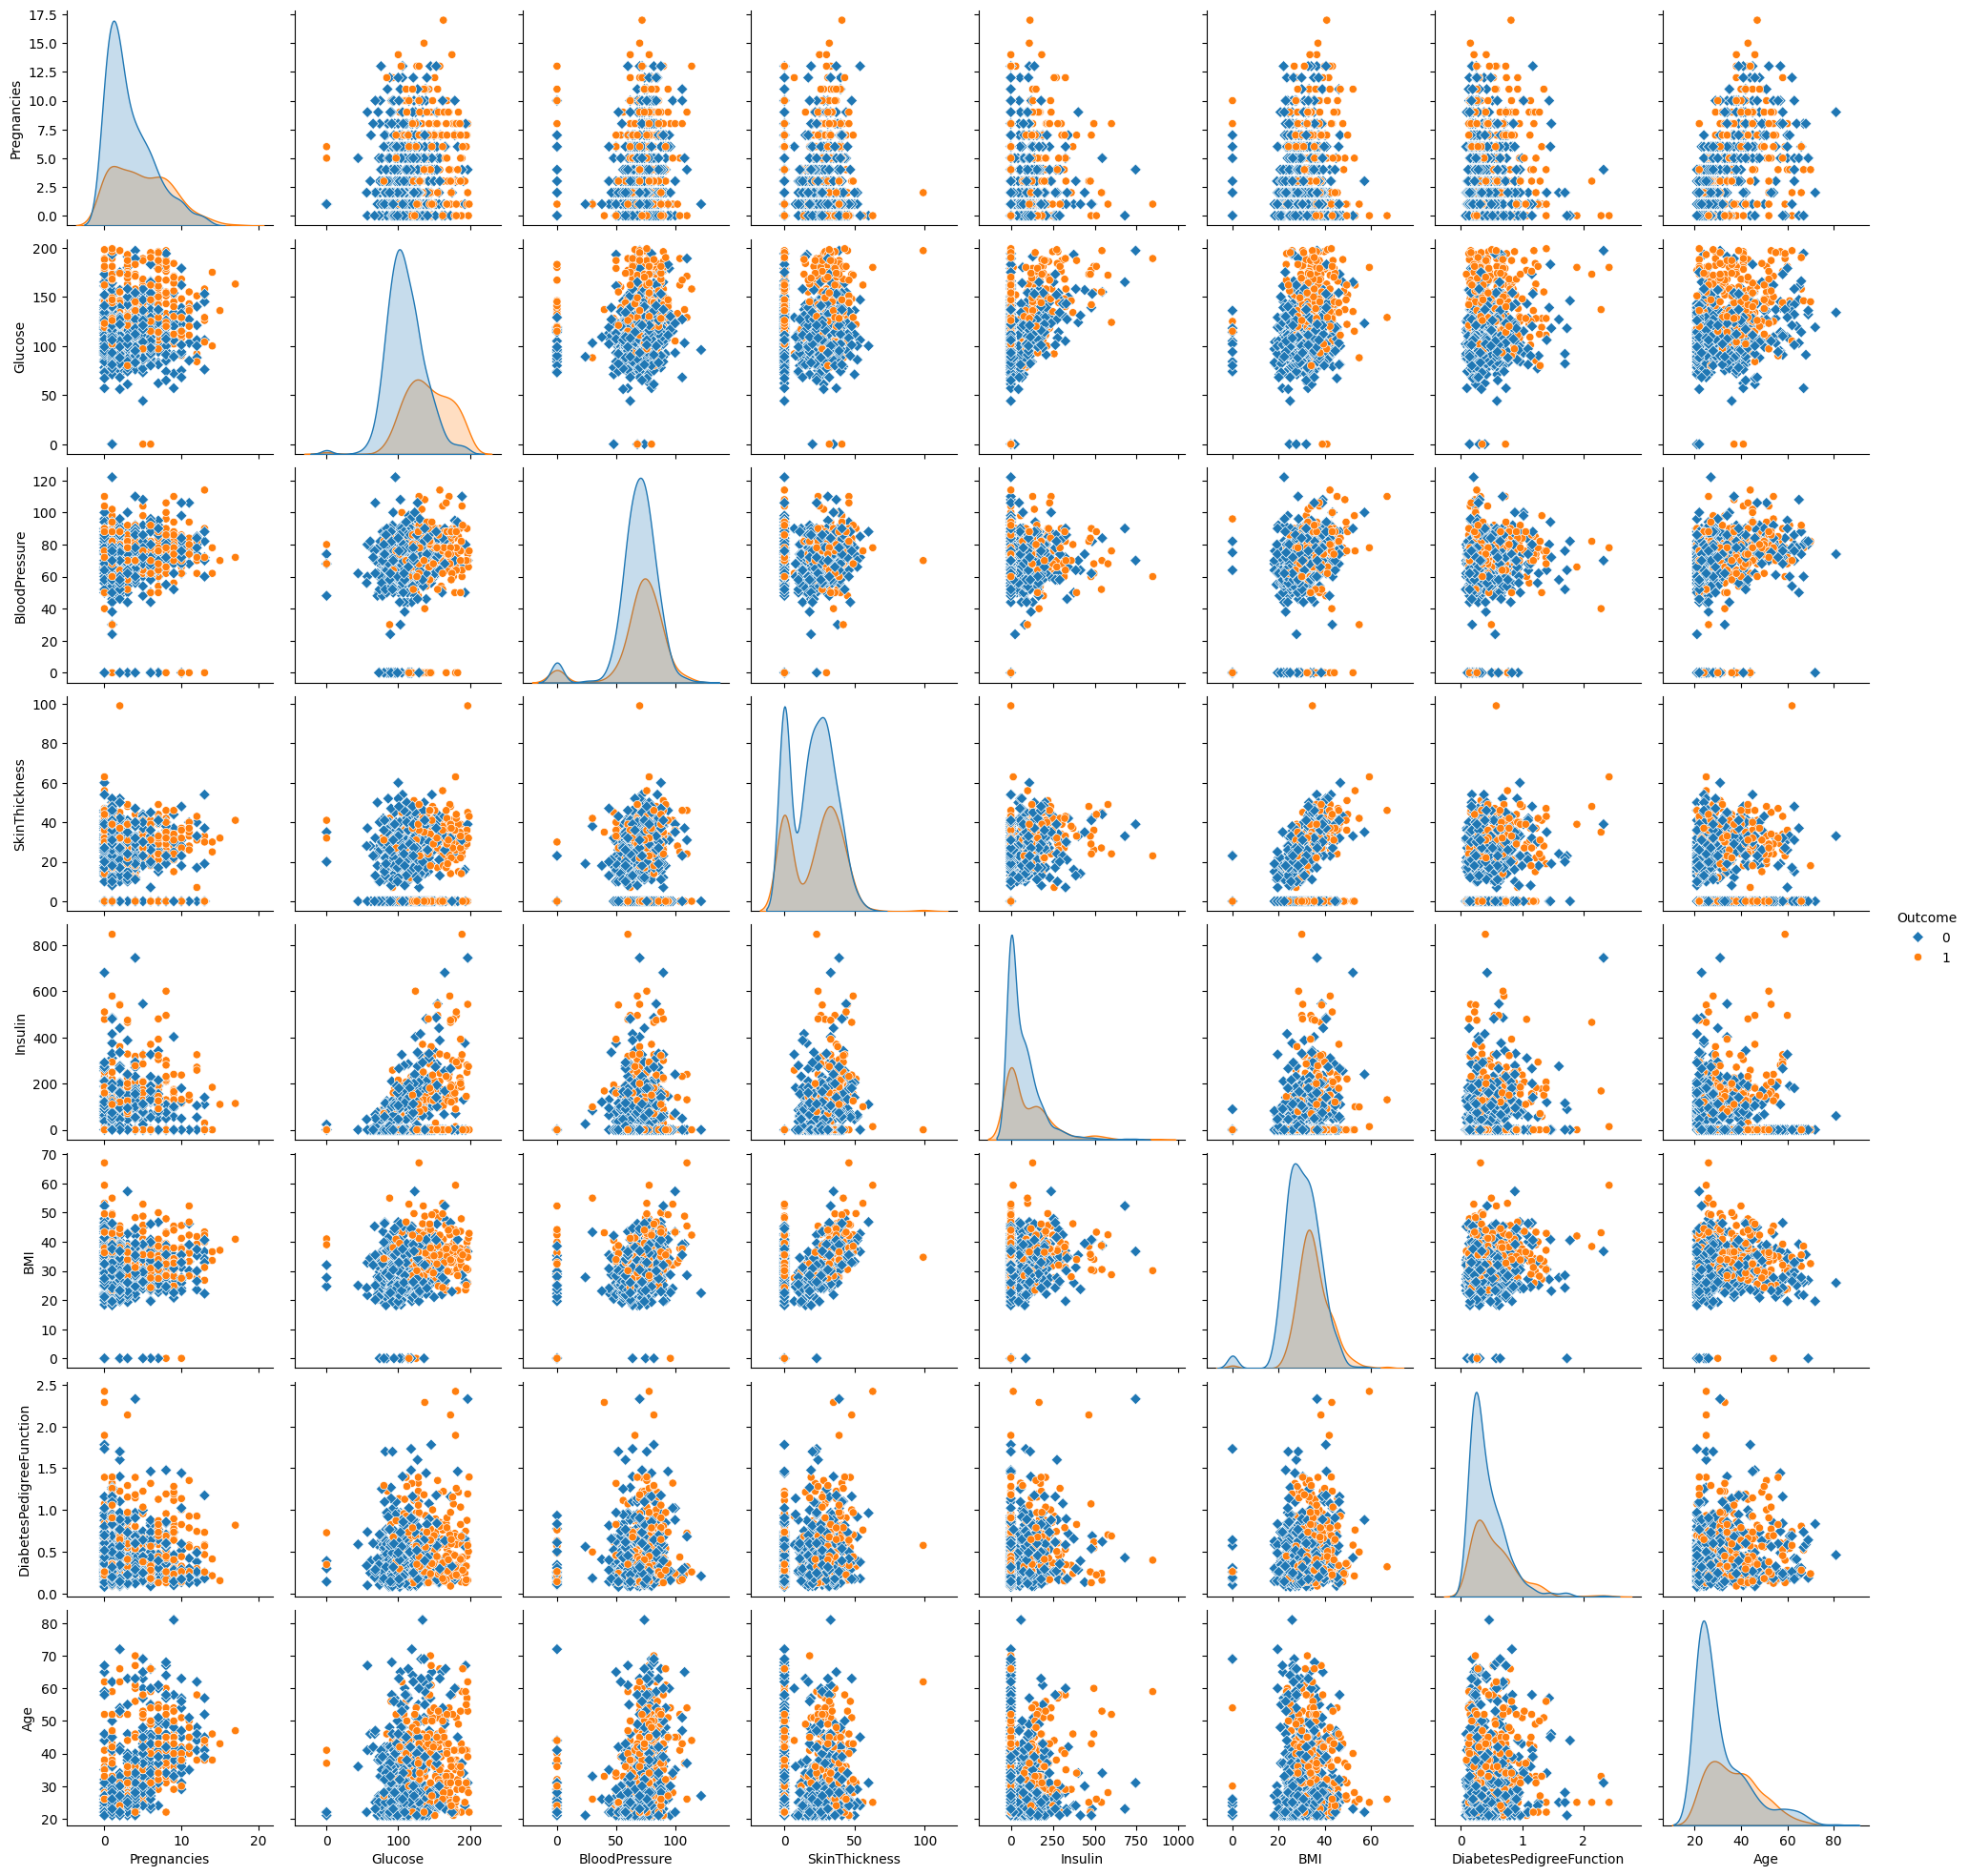

In [11]:
# Explore the distribution of each feature to understand their characteristics and patterns
import seaborn as sns
sns.pairplot(diabetes_df,hue='Outcome',markers=['D', 'o']);

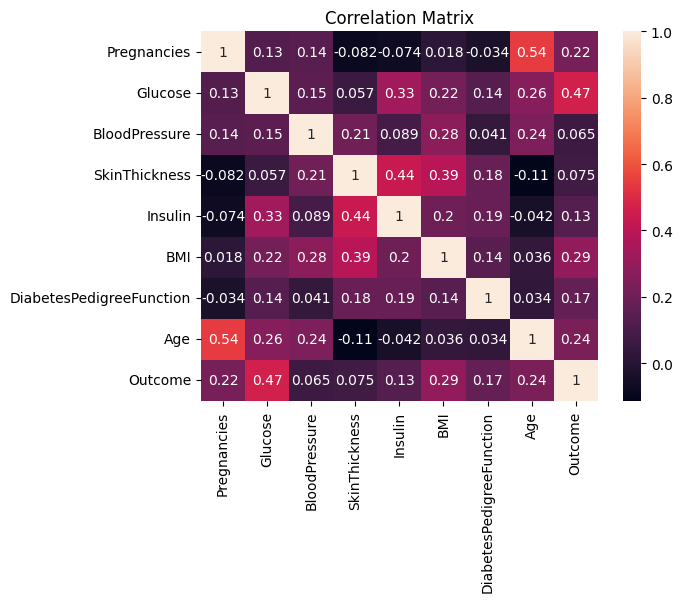

In [12]:
# Create the correlation heatmap
corr_matrix =diabetes_df [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
# Show the plot
plt.show()

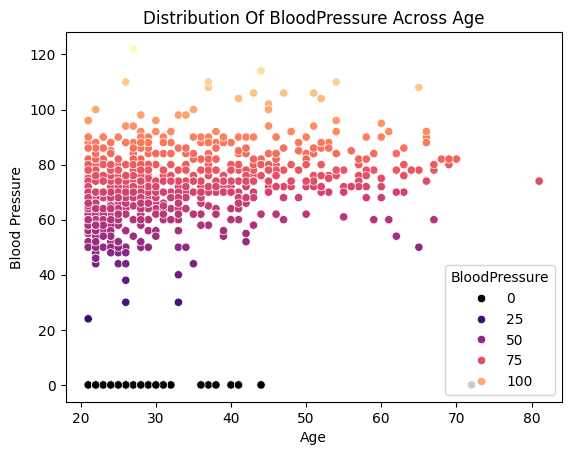

In [13]:
# Visualizing the distribution of blood pressure across age
sns.scatterplot(data=diabetes_df, x='Age', y='BloodPressure', hue='BloodPressure', palette='magma')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Distribution Of BloodPressure Across Age')
plt.show()

# **Feature Engineering**


In [14]:
# Applying threshold for the features
# Glucode
def Glucose_status(glucose):
    if glucose >= 126:
       return 'Diabetes'
    elif glucose >=100:
        return 'Prediabetes'
    else:
       return 'Normal'
        
def BMI_status(bmi):
    if bmi >=30:
        return 'Obese'
    elif bmi >= 25:
        return 'Overweight'
    elif bmi >= 18.5:
        return 'Normal Weight'
    else:
        return 'Underweight'
        
def Age_group(Age):
    if Age > 60:
        return 'Senior'
    elif Age>=30:
        return 'Adult'
    else:
        return 'Young Adult'
        
def BP_status(BloodPresssure):
   if BloodPresssure >= 130:
       return 'High BP'
   elif BloodPresssure >= 120:
      return'Elevated'
   else:
        return 'Normal Bp'
    
diabetes_df['Glucose_Status'] = diabetes_df['Glucose'].apply(Glucose_status)
diabetes_df['BMI_Status'] = diabetes_df['BMI'].apply(BMI_status)
diabetes_df['BP_Status'] = diabetes_df['BloodPressure'].apply(BP_status)
diabetes_df['Age_Group'] = diabetes_df['Age'].apply(Age_group)

In [15]:
diabetes_df.head().T

,0,1,2,3,4
Pregnancies,6,1,8,1,0
Glucose,148,85,183,89,137
BloodPressure,72,66,64,66,40
SkinThickness,35,29,0,23,35
Insulin,0,0,0,94,168
BMI,33.6,26.6,23.3,28.1,43.1
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50,31,32,21,33
Outcome,1,0,1,0,1
Glucose_Status,Diabetes,Normal,Diabetes,Normal,Diabetes


In [16]:
for feature in diabetes_df.columns:
    if diabetes_df[feature].dtype.kind in 'bifc':  # check if column is numeric
        Q1 = diabetes_df[feature].quantile(0.25)
        Q3 = diabetes_df[feature].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1- 1.5*IQR
        upper = Q3 + 1.5*IQR
        
        if diabetes_df[(diabetes_df[feature] > upper)].any(axis=None):
            print(feature,"yes")
        else:
            print(feature, "no")
    else:
        print(feature, "is not a numeric column")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no
Glucose_Status is not a numeric column
BMI_Status is not a numeric column
BP_Status is not a numeric column
Age_Group is not a numeric column


In [17]:
diabetes_df['Glucose_Status'] = diabetes_df['Glucose_Status'].map({'Normal': 0, 'Diabetes' : 1, 'Prediabetes': 2})
diabetes_df['BMI_Status'] = diabetes_df['BMI_Status'].map({'Normal Weight': 0, 'Overweight': 1, 'Obese': 2, 'Underweight': 3})
diabetes_df['BP_Status'] = diabetes_df['BP_Status'].map({'Normal Bp': 0, 'Elevated': 1, 'High BP': 2})
diabetes_df.head().T

,0,1,2,3,4
Pregnancies,6,1,8,1,0
Glucose,148,85,183,89,137
BloodPressure,72,66,64,66,40
SkinThickness,35,29,0,23,35
Insulin,0,0,0,94,168
BMI,33.6,26.6,23.3,28.1,43.1
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50,31,32,21,33
Outcome,1,0,1,0,1
Glucose_Status,1,0,1,0,1


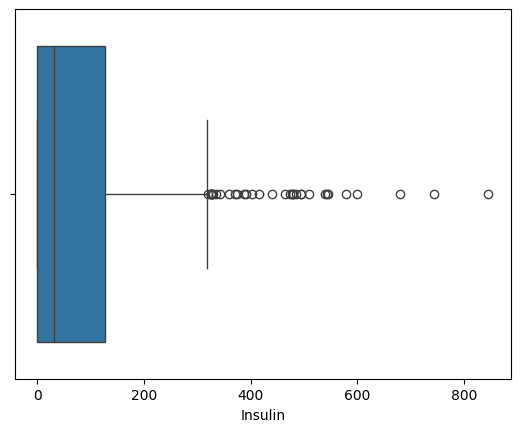

In [18]:
import seaborn as sns
sns.boxplot(x = diabetes_df["Insulin"]);

## **Exploring Variable Relationships Through Visualization**

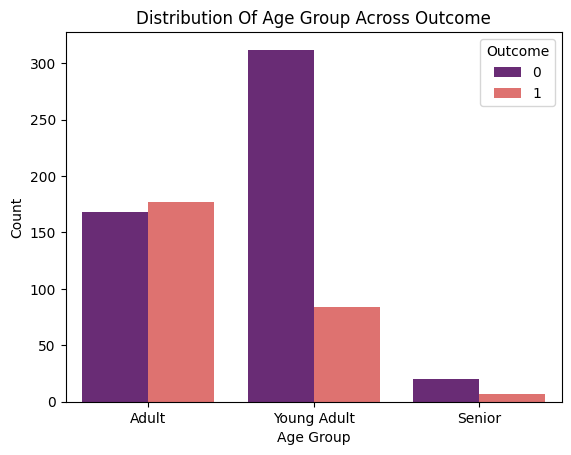

In [19]:
# Distribution of Age Group Across Outcome
sns.countplot(data=diabetes_df, x='Age_Group', hue='Outcome', palette='magma')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution Of Age Group Across Outcome')
plt.show()

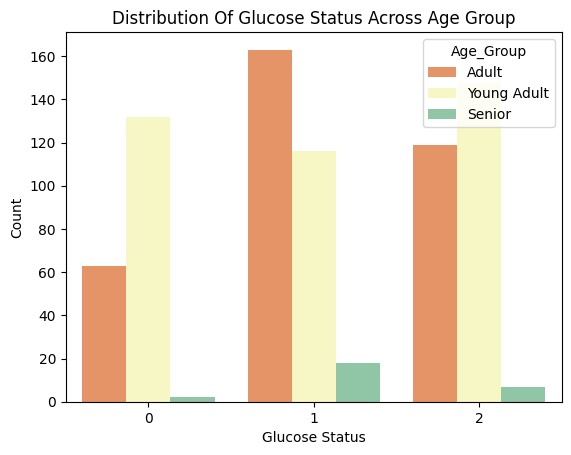

In [20]:
# Distribution of Glucose Status Across Age Group
sns.countplot(data=diabetes_df, x='Glucose_Status', hue='Age_Group', palette='Spectral')
plt.xlabel('Glucose Status')
plt.ylabel('Count')
plt.title('Distribution Of Glucose Status Across Age Group')
plt.show()


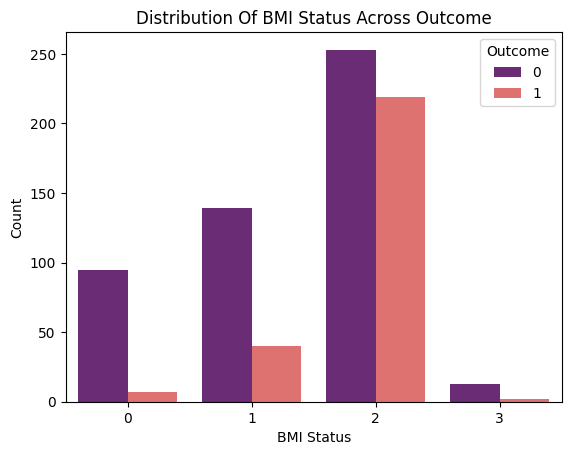

In [21]:
# Distribution of BMI Status Across Outcome
sns.countplot(data=diabetes_df, x='BMI_Status', hue='Outcome', palette='magma')
plt.xlabel('BMI Status')
plt.ylabel('Count')
plt.title('Distribution Of BMI Status Across Outcome')
plt.show()

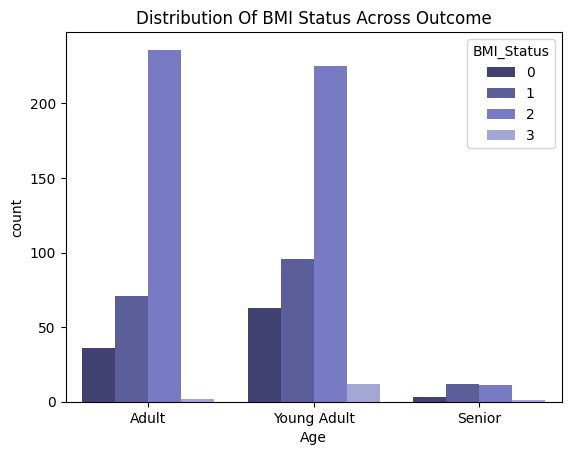

In [22]:
sns.countplot(data=diabetes_df, x='Age_Group', hue='BMI_Status', palette='tab20b')
plt.xlabel('Age')
plt.title('Distribution Of BMI Status Across Outcome')
plt.show()

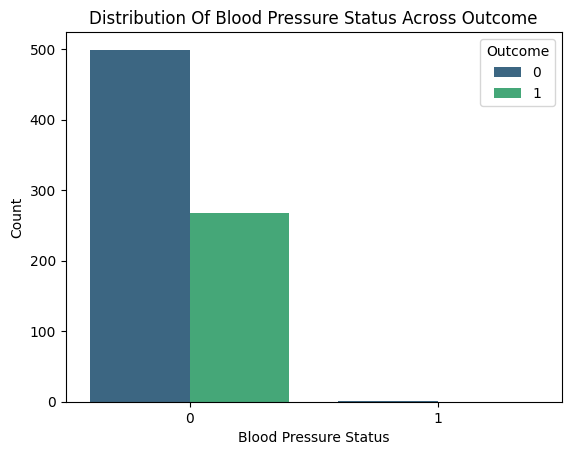

In [23]:
# Distribution of Blood Pressure Status Across Outcome
sns.countplot(data=diabetes_df, x='BP_Status', hue='Outcome', palette='viridis')
plt.xlabel('Blood Pressure Status')
plt.ylabel('Count')
plt.title('Distribution Of Blood Pressure Status Across Outcome')
plt.show()

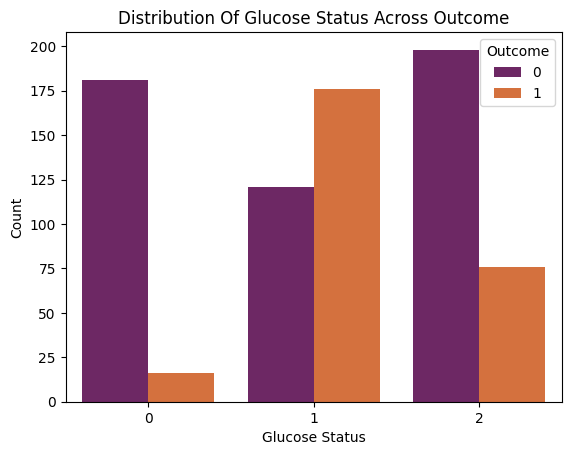

In [24]:
# Distrubution of Glucose Status Across Outcome
sns.countplot(data=diabetes_df, x='Glucose_Status', hue='Outcome', palette='inferno')
plt.xlabel('Glucose Status')
plt.ylabel('Count')
plt.title('Distribution Of Glucose Status Across Outcome')
plt.show()

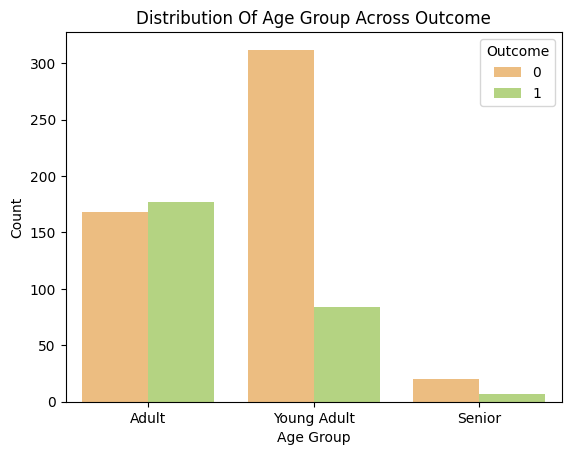

In [25]:
# Distribution of Age Group Across Outcome
sns.countplot(data=diabetes_df, x='Age_Group', hue='Outcome', palette='RdYlGn')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution Of Age Group Across Outcome')
plt.show()

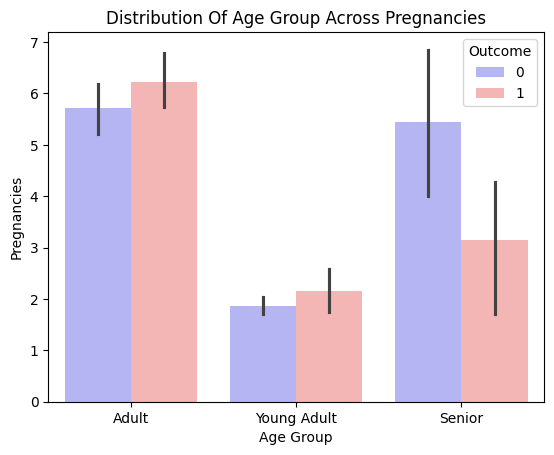

In [26]:
# Distribution of Age Group Across Pregnancies
sns.barplot(data=diabetes_df, x='Age_Group', y='Pregnancies', hue='Outcome', palette='bwr')
plt.xlabel('Age Group')
plt.ylabel('Pregnancies')
plt.title('Distribution Of Age Group Across Pregnancies')
plt.show()

In [27]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Status,BMI_Status,BP_Status,Age_Group
0,6,148,72,35,0,33.6,0.627,50,1,1,2,0,Adult
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,Adult
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0,Adult
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,Young Adult
4,0,137,40,35,168,43.1,2.288,33,1,1,2,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2,2,0,Senior
764,2,122,70,27,0,36.8,0.340,27,0,2,2,0,Young Adult
765,5,121,72,23,112,26.2,0.245,30,0,2,1,0,Adult
766,1,126,60,0,0,30.1,0.349,47,1,1,2,0,Adult


## **Base Models**

In [28]:
# Drop the 'Age_Group' column
diabetes_df = diabetes_df.drop('Age_Group', axis=1) 

# Split the data
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()  # Fixed the typo here
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-learn machine learning models.
    '''

    # Dictionary to store model scores
    model_scores = {}  # Fixed the variable name

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [29]:
# Call the function
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7597402597402597}

(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

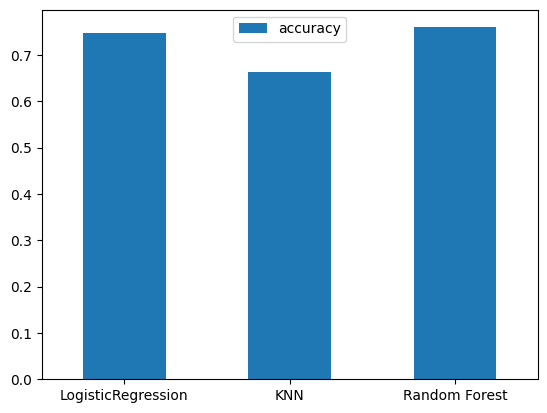

In [30]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation=0)

In [31]:
#Tune Knn
train_scores = []
test_scores = []

# A list of different Values of n_neighbors
n_neighbors = np.arange(1, 21, 1)

knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [32]:
X_train.shape

(614, 11)

In [33]:
y_train.shape

(614,)

Maximum KNN score on the test data: 77.92%


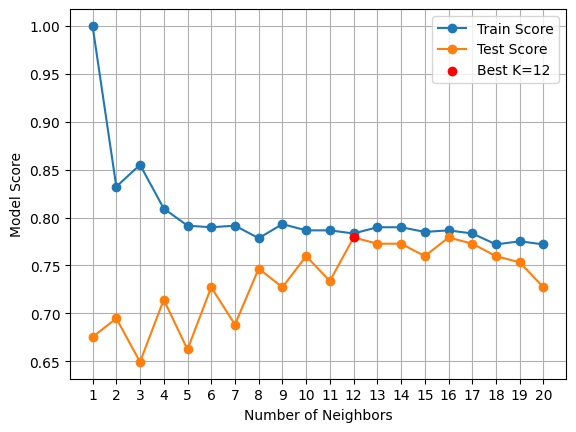

In [34]:
# Plot the training and test scores
plt.plot(n_neighbors, train_scores, label='Train Score', marker='o')
plt.plot(n_neighbors, test_scores, label='Test Score', marker='o')

# Highlight the best-performing number of neighbors
best_k = n_neighbors[np.argmax(test_scores)]
best_score = max(test_scores) * 100
plt.scatter(best_k, best_score / 100, color='red', label=f'Best K={best_k}', zorder=3)

# Formatting
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)

# Print the maximum score
print(f'Maximum KNN score on the test data: {best_score:.2f}%')

# Show the plot
plt.show()


## _Hyperparameter Tuning With RandomizedSearchCV_

In [74]:
# Parameters for Logistic Regression
grid_logistic_regression = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    "max_iter": [1000, 1200, 1400],
}

# Different RandomForestClassifier hyperparameters
grid_random_forest = {
    "n_estimators": np.arange(10, 300, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

In [75]:
# Tune logistic Regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fit random hyperameters search model fot logistict Regrssion
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [76]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(2807.2162039411755)}

In [79]:
rs_log_reg.best_score_

np.float64(0.7703985072637611)

In [77]:
np.random.seed(42)

# set-up random hyperparamaters
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter = 5,
    verbose=True
)

#Fit random hyperparameters
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [39]:
rs_rf.best_params_

{'n_estimators': np.int64(760),
 'min_samples_split': np.int64(3),
 'max_depth': 5}

In [71]:
rs_rf.best_score_

np.float64(0.7736505397840864)

In [78]:
rs_model_scores = {
    "rs_log_reg": rs_log_reg.best_score_,
    "rs_rf": rs_rf.best_score_,
}

## _Hyperparameters Tuning With GridSearchCV_

In [80]:
# Different Hyperparameters
log_reg_grid = {
    'C' : np.logspace(-4, 4, 30),
    'solver' : ['liblinear']
}


rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [81]:

# setup the hyperparameters search for log_reg
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [82]:
gs_log_reg.best_params_

{'C': np.float64(117.21022975334793), 'solver': 'liblinear'}

In [83]:
gs_log_reg.best_score_

np.float64(0.7703985072637611)

In [87]:
rf = RandomForestClassifier(random_state=42)
gs_rf = GridSearchCV(estimator=rf, param_grid=rf_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [88]:
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [89]:
gs_rf.best_score_

np.float64(0.7866586698653872)

In [90]:
gs_model_scores = {
    "gs_log_reg": rs_log_reg.best_score_,
    "gs_rf": rs_rf.best_score_,
}

In [98]:
rs_model_scores= {
    'rs_log_reg' : rs_log_reg.best_score_,
    'rs_rf' : rs_rf.best_score_
}

## _Evaluating The Tuned Machine Learning Classifier Beyond Accuracy
- ROC Curve And AUC Score
- Confusion Matrix
- Classification Report 
- Precision 
- Recall
- F1-score

In [43]:
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [44]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

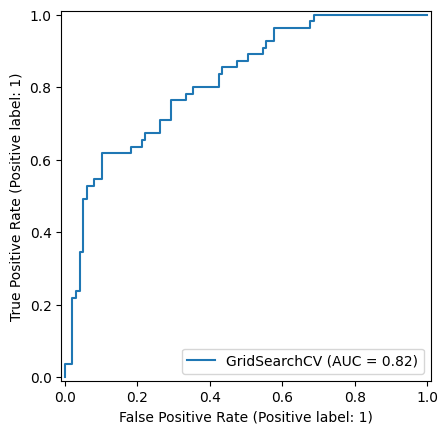

In [109]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);


In [46]:
print(confusion_matrix(y_test, y_pred))

[[76 23]
 [18 37]]


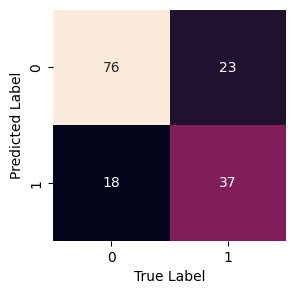

In [47]:
def plot_confusion_matrix(y_test, y_pred):
    '''
    Plots a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ac = sns.heatmap(confusion_matrix(y_test,y_pred),
    annot=True,
    cbar=False)

    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    bottom, top = ax.get_ylim()
    ax.set_ylib = (bottom + 0.5, top - 0.5)
    
plot_confusion_matrix(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [49]:
gs_log_reg.best_params_

{'C': np.float64(117.21022975334793), 'solver': 'liblinear'}

In [50]:

# Define the model with an appropriate value for C
lr_model = LogisticRegression(C=1.0, solver='liblinear')

# Perform cross-validation
cv_acc = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.75974026, 0.72077922, 0.77272727, 0.79738562, 0.75816993])

In [51]:
cv_precision = cross_val_score(lr_model, X, y,cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.7146907551032167)

In [52]:
cv_f1 = cross_val_score(lr_model, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.614468513005075)

In [62]:
cv_recall= cross_val_score(lr_model,X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.5559748427672956)

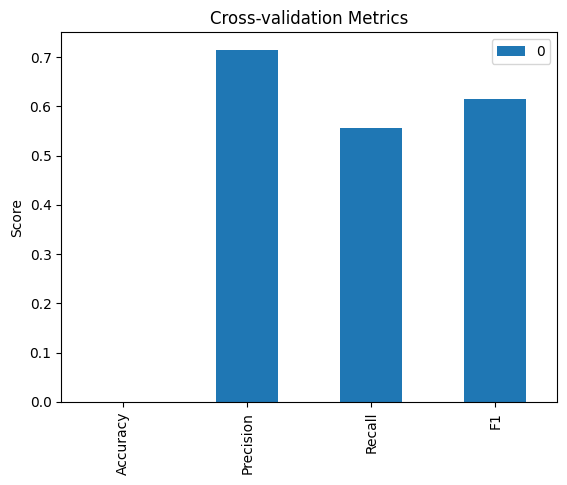

In [63]:
cv_metrics = pd.DataFrame({
    'Accuracy': [pd.to_numeric(cv_acc, errors='coerce')],
    'Precision': [pd.to_numeric(cv_precision, errors='coerce')],
    'Recall': [pd.to_numeric(cv_recall, errors='coerce')],
    'F1': [pd.to_numeric(cv_f1, errors='coerce')]
})
cv_metrics = cv_metrics.apply(pd.to_numeric, errors='coerce')
cv_metrics.T.plot.bar()
plt.ylabel("Score")
plt.title("Cross-validation Metrics")
plt.show()

##  _Final Model Evaluation_

In [94]:
# grid Search model score
gs_model_scores

{'gs_log_reg': np.float64(0.7703985072637611),
 'gs_rf': np.float64(0.7736505397840864)}

In [99]:
# randomizedSearch model score
rs_model_scores

{'rs_log_reg': np.float64(0.7703985072637611),
 'rs_rf': np.float64(0.7736505397840864)}

In [ ]:
# Model scores
model_scores


{'LogisticRegression': 0.7467532467532467,
 'KNN': 0.6623376623376623,
 'Random Forest': 0.7597402597402597}

In [102]:
y_lr_preds = gs_log_reg.predict(X_test)
y_lr_preds

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [103]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

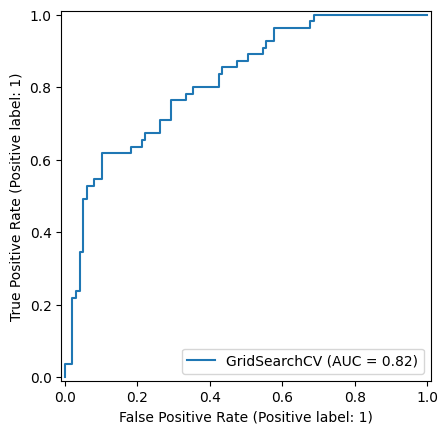

In [104]:

# Let's use sklearn to calculate and display "(ROC) Receiver Operating Characteristics Curve"
# It will also show us the AUC score of our model

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [106]:
conf_mat = confusion_matrix(y_test, y_lr_preds)
print(conf_mat) # Indeed good results


[[76 23]
 [18 37]]


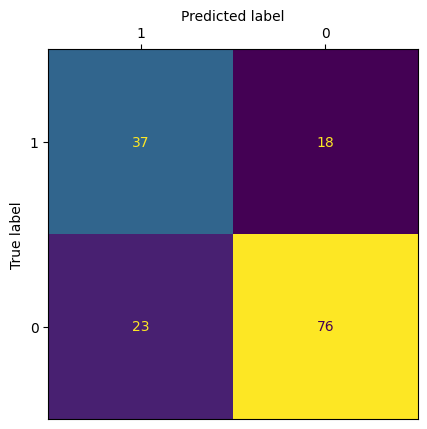

In [111]:

# Visualizing our Confusion Matrix
# `from_estimator` method expects a trained ML model to test on given data!
ConfusionMatrixDisplay.from_estimator(
    gs_log_reg,
    X_test,
    y_test,
    labels=[1, 0],  # Based on above anatomy
    colorbar=False,
)

# Customize based on above anatomy!
plt.gca().xaxis.set_ticks_position("top")
plt.gca().xaxis.set_label_position("top")
plt.show()

In [112]:

# Getting a Classification Report
# A combination of classification metrics!

print(
    classification_report(y_test, y_lr_preds)
)


              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [115]:
# Best Hyperparameters till now
gs_log_reg.best_params_

{'C': np.float64(117.21022975334793), 'solver': 'liblinear'}

In [118]:

# Calculate all remaining metrics
accuracy = accuracy_score(y_test, y_lr_preds)
precision = precision_score(y_test, y_lr_preds)
recall = recall_score(y_test, y_lr_preds)
f1_metric = f1_score(y_test, y_lr_preds)


# Let's see
accuracy, precision, recall, f1_metric

(0.7337662337662337,
 0.6166666666666667,
 0.6727272727272727,
 0.6434782608695652)

In [119]:

# Create a DataFrame to organize
final_evaluation = pd.DataFrame(
    [accuracy, precision, recall, f1_metric],
    index=["Accuracy", "Precision", "Recall", "F1_Score"],
    columns=["Score"],
)

final_evaluation



,Score
Accuracy,0.733766
Precision,0.616667
Recall,0.672727
F1_Score,0.643478


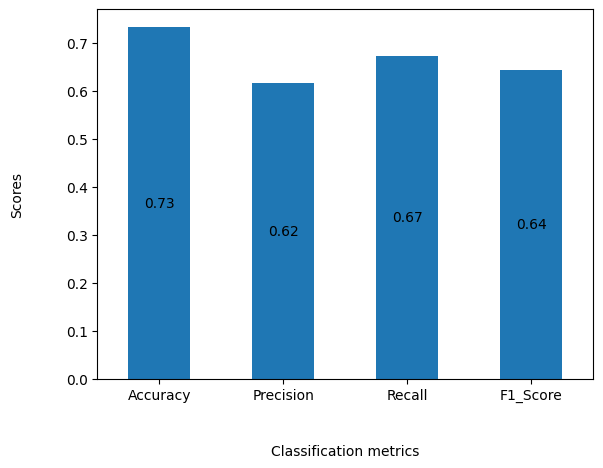

In [120]:
# Visualize
bars = final_evaluation.plot.bar(
    legend=False,
    xlabel="Classification metrics",
    ylabel="Scores",
    rot=0, 
)

# Customize
plt.bar_label(
    bars.containers[0],
    fmt="%1.2g",
    label_type="center",
    color="black"
)

plt.xlabel("Classification metrics", labelpad=30)
plt.ylabel("Scores", labelpad=30)

plt.show()

## _Feature Importance_

In [126]:

# let's check "coef_" of our linear_reg model
best_log_reg = gs_log_reg.best_estimator_
best_log_reg


LogisticRegression(C=np.float64(117.21022975334793), solver='liblinear')

In [127]:
best_log_reg.coef_

array([[ 0.0537102 ,  0.03394093, -0.01527697,  0.00216675, -0.00190386,
         0.06638065,  0.73026113,  0.04161999,  0.31488835,  0.77199703,
        -0.02792661]])

In [128]:
# Training Features

X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_Status',
       'BMI_Status', 'BP_Status'],
      dtype='object')

In [130]:
# Creating a Pandas DataFrame

imp_features = pd.DataFrame(
    data=best_log_reg.coef_.T, index=X_train.columns, columns=["Coef_"]
)

imp_features


,Coef_
Pregnancies,0.053710
Glucose,0.033941
BloodPressure,-0.015277
SkinThickness,0.002167
Insulin,-0.001904
BMI,0.066381
DiabetesPedigreeFunction,0.730261
Age,0.041620
Glucose_Status,0.314888
BMI_Status,0.771997


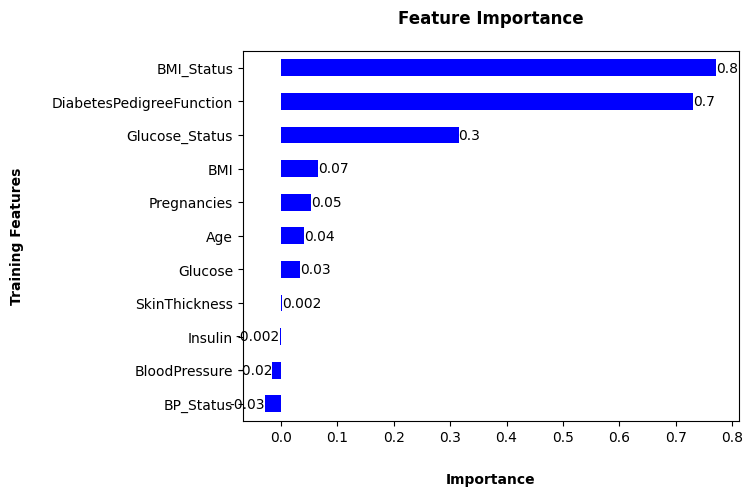

In [131]:
bar = imp_features.sort_values(by="Coef_").plot.barh(
    legend=False,
    color="blue"
)

# Customize
bar.set_xlabel(xlabel="Importance", labelpad=20, weight="bold")
bar.set_ylabel(ylabel="Training Features", labelpad=20, weight="bold")
bar.set_title("Feature Importance", pad=20, weight="heavy")
bar.bar_label(bar.containers[0], fmt="%1.1g")

plt.show(bar)

In [133]:
# Compare using cross-tab

pd.crosstab(diabetes_df.BMI_Status, diabetes_df.Outcome)

Outcome,0,1
BMI_Status,,
0,95,7
1,139,40
2,253,219
3,13,2


In [134]:
pd.crosstab(diabetes_df.Age, diabetes_df.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


In [139]:
# Import joblib
import joblib as jbl

jbl.dump(best_log_reg, filename="./diabetes_logistic_73%")

['./diabetes_logistic_73%']

In [140]:


# Let's test to load our model again!

loaded_log_reg = jbl.load("./diabetes_logistic_73%")

loaded_log_reg.score(X_test, y_test) # Great


0.7337662337662337